In [1]:
# Data manipulation 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Manifold and Classifier
from sklearn.manifold import TSNE
from sklearn.svm import SVC

# Feature selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
# High dimensional data import
ansur = pd.read_csv('~/DevSpace/Data-Snippets/MachineLearning/datasets/ansur.csv')
ansur.drop('ID', axis=1, inplace=True)
print(f'Number of dimensions (cols): {len(ansur.columns)}')

Number of dimensions (cols): 94


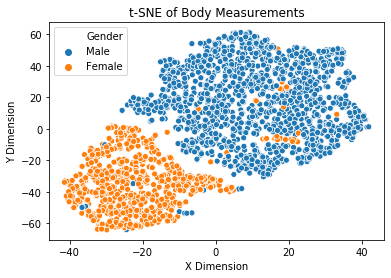

In [3]:
# Instanciate TSNE Model to visualize data
tsne_model = TSNE(learning_rate=50)

# Fit and transform numeric data from 4th column
tsne_features = tsne_model.fit_transform(ansur.iloc[:, 4:])

# Plot transformed data
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=ansur['Gender'])
plt.xlabel('X Dimension')
plt.ylabel('Y Dimension')
plt.title('t-SNE of Body Measurements')

plt.show()

In [4]:
# Select data
y = ansur['Gender']
X = ansur.drop(['Branch', 'Component', 'Gender'], axis=1)

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

# Instanciate model and fit model
svm = SVC()
svm.fit(X_train, y_train)

# Measure accuracy
acc_train = accuracy_score(y_train, svm.predict(X_train))
acc_test = accuracy_score(y_test, svm.predict(X_test))

# Measure overfitting
print(f'{acc_train = }')
print(f'{acc_test = }')

acc_train = 0.9714285714285714
acc_test = 0.9666666666666667


In [5]:
# Predict Gender based on 'neckcircumferencebase' feature 
y = ansur['Gender']
X = ansur[['neckcircumferencebase']]

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

# Instanciate model and fit model
svm = SVC()
svm.fit(X_train, y_train)

# Measure accuracy
acc_train = accuracy_score(y_train, svm.predict(X_train))
acc_test = accuracy_score(y_test, svm.predict(X_test))

# Measure overfitting
print(f'{acc_train = }')
print(f'{acc_test = }')

acc_train = 0.9342857142857143
acc_test = 0.9316666666666666


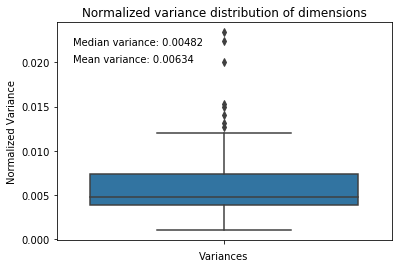

In [6]:
# Distribution of the variance of each dimension

# Normalize
numeric_dims = ansur.iloc[:, 3:-2] / ansur.iloc[:, 3:-2].mean()

# Calculate variances, median and mean
vars = numeric_dims.std() ** 2
median = round(vars.quantile(), 5)
mean = round(vars.mean(), 5)

# Plot variance distribution and annotate
sns.boxplot(y=vars.values)

# Add median and mean
plt.annotate(f'Median variance: {median}', (-0.45, 0.022))
plt.annotate(f'Mean variance: {mean}', (-0.45, 0.020))

# Add labels
plt.xlabel('Variances')
plt.ylabel('Normalized Variance')
plt.title('Normalized variance distribution of dimensions')
plt.show()


In [7]:
# Reduce dimensionality with a variance threshold (median variance)
variance_selection = VarianceThreshold(threshold=0.00482)

# Fit variance selector
variance_selection.fit(numeric_dims)

# Get variance mask
mask = variance_selection.get_support()

# Reduced ansur
reduced_ansur = numeric_dims.loc[:, mask]

# New number of dimensions
print(f'Old dimensions: {len(ansur.columns)}')
print(f'New dimensions: {len(reduced_ansur.columns)}')

Old dimensions: 94
New dimensions: 44


In [8]:
# Predict Gender based on reduced dataset
y = ansur['Gender']
X = reduced_ansur

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

# Instanciate model and fit model
svm = SVC(C=0.1)
svm.fit(X_train, y_train)

# Measure accuracy
acc_train = accuracy_score(y_train, svm.predict(X_train))
acc_test = accuracy_score(y_test, svm.predict(X_test))

# Measure overfitting abs(train - test / test)
print(f'{acc_train = }')
print(f'{acc_test = }')

acc_train = 0.9971428571428571
acc_test = 1.0
